# Using JAX automatic differentiation in halox

Because all functions in `halox` are implemented in terms of JAX primitive expressions (or rely on `jax-cosmo` functions, which are also fully JAX-friendly), they can be automatically differentiated with respect to their inputs.

This notebook provides a few examples of how this can be used in practice, and will be updated with new examples as `halox` keeps receiving new features.

In [1]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import halox
import jax_cosmo as jc

jax.config.update("jax_enable_x64", True)

plt.style.use("petroff10")

## Differentiating with respect to redshift

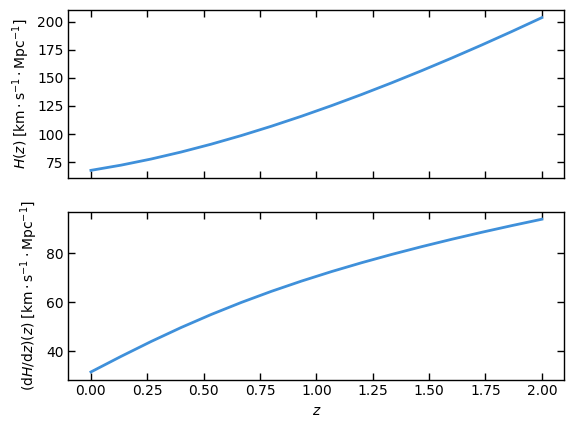

In [2]:
cosmo = halox.cosmology.Planck18()

def H(z):
    return halox.cosmology.hubble_parameter(z, cosmo)

H_and_grad = jax.value_and_grad(H)

zs = jnp.linspace(0, 2, 16)
Hs, dHdzs = jax.vmap(H_and_grad)(zs)

fig, axs = plt.subplots(2, 1)
axs[0].plot(zs, Hs, lw=2)
axs[0].set_ylabel("$H(z) \\; [{\\rm km \\cdot s^{-1} \\cdot Mpc^{-1}}]$")
axs[0].set_xticklabels([])

axs[1].plot(zs, dHdzs, lw=2)
axs[1].set_ylabel(
    "$\\left( {\\rm d}H / {\\rm d}z \\right) (z)\\;"
    + "[{\\rm km \\cdot s^{-1} \\cdot Mpc^{-1}}]$"
)
axs[1].set_xlabel("$z$")

for ax in axs:
    ax.xaxis.set_ticks_position("both")
    ax.yaxis.set_ticks_position("both")

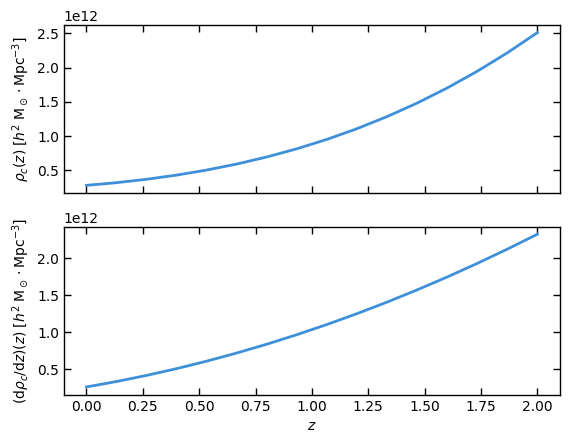

In [3]:
def rho_c(z):
    return halox.cosmology.critical_density(z, cosmo)

rho_and_grad = jax.value_and_grad(rho_c)

zs = jnp.linspace(0, 2, 16)
rhos, drhodzs = jax.vmap(rho_and_grad)(zs)

fig, axs = plt.subplots(2, 1)
axs[0].plot(zs, rhos, lw=2)
axs[0].set_ylabel("$\\rho_c(z) \\; [h^2 \\; {\\rm M_\\odot \\cdot Mpc^{-3}}]$")
axs[0].set_xticklabels([])

axs[1].plot(zs, drhodzs, lw=2)
axs[1].set_ylabel(
    "$\\left( {\\rm d}\\rho_c / {\\rm d}z \\right) (z)\\;"
    + "[h^2 \\; {\\rm M_\\odot \\cdot Mpc^{-3}}]$"
)
axs[1].set_xlabel("$z$")

for ax in axs:
    ax.xaxis.set_ticks_position("both")
    ax.yaxis.set_ticks_position("both")


## Differentiating with respect to cosmology

In [4]:
def H_1(w0):
    cosmo = jc.Planck15(w0=w0)
    return halox.cosmology.hubble_parameter(1.0, cosmo)

H_and_grad = jax.value_and_grad(H_1)

w0s = jnp.array([-1.2, -1.1, -1.0])
Hs, dHdws = jax.vmap(H_and_grad)(w0s)

print(f"w_0 = {w0s}")
print(f"H(z=1) = {Hs} [km s-1 Mpc-1]")
print(f"dH_1/dw_0 = {dHdws} [km s-1 Mpc-1]")


w_0 = [-1.2 -1.1 -1. ]
H(z=1) = [115.6922973  117.76798759 120.27427285] [km s-1 Mpc-1]
dH_1/dw_0 = [18.84102128 22.78718246 27.4697143 ] [km s-1 Mpc-1]


In [5]:
def hmf_1e14_0p5(sigma8):
    cosmo = jc.Planck15(sigma8=sigma8)
    return halox.hmf.tinker08_mass_function(1e14, 0.5, cosmo, delta_c=200.0)

hmf_and_grad = jax.value_and_grad(hmf_1e14_0p5)

sigma8s = jnp.array([0.8, 0.85, 0.9])
hmfs, dhmfdsigma8s = jax.vmap(hmf_and_grad)(sigma8s)

print(f"sigma_8 = {sigma8s}")
print(f"dN/dlnM(M200c=1e14 h-1 Msun, z=0.5) = {hmfs} [h3 Mpc-3]")
print(
    "d(dN/dlnM(M200c=1e14 h-1 Msun, z=0.5))/dsigma_8 "
    f"= {dhmfdsigma8s} [h3 Mpc-3]"
)


sigma_8 = [0.8  0.85 0.9 ]
dN/dlnM(M200c=1e14 h-1 Msun, z=0.5) = [1.62898095e-05 2.03306704e-05 2.43123380e-05] [h3 Mpc-3]
d(dN/dlnM(M200c=1e14 h-1 Msun, z=0.5))/dsigma_8 = [8.04095582e-05 8.06890205e-05 7.81862040e-05] [h3 Mpc-3]
